# PCA: Principle Component Analysis

## Understanding PCA with an example
### Caveat: The example is a long one but I think you will understand it better if you read it.
Let's say you work as a Data Scientist for an Ad Marketing Agency where your task is to analyze the data about customer purchases and find patterns as to **what made a user buy something and how can I make him/her buy more?**

Now, this question we posed above can have so many follow up questions, like:
1. Where did the user prefer buying from ? (Amazon, Flipkart, etc)
2. What kind of add did the user click most time on? (display ads, search ads, product listing ads, email, etc)
3. Which ad networks/channel showed most conversions? (Facebook, Google, Twitter, LinkedIn)
4. Some complex questions can include, did a user first see an ad on Facebook and then googled up to see the best prices and buy it? <br>
These are just some question out of the thousands that can be answered to improve user experience, customer acquisition, etc

**Let's look what kind of data you may get to analyze.** Let's accept the fact that, storing the information in __RDBMS__ is not a good option because there will be lot of user tracking data that would come in various formats and very difficult to store in RDBMS. <br>
So, this kind of tracking data is usually dumped into a __Data Warehouse__ and then various pipelines are written to extract useful ones into RDBMS to make them faster. I will not go into the details of this, if you are interested, you can read about the same with links in the references section.

So without diverting from a main point, if we have huge number of data, we can just shard them and use them sequentially to keep it very simple, however, if we have more number of fields/columns/features to extract information from, then it would become really time consuming and difficult as well. **Imagine you have data about a user, which shows entire tracking of that particular user for a entire day/month/year, from various places, on various sites, on various products, at various times, from various devices, using various social accounts, etc are stored in a warehouse.**

Simply put, not all of what is stored in the warehouse is useful information and hence we can exclude some of them from our analysis. But, the billion dollar question is, 'HOW'??? How do you actually find out which one is useful and which one is not? <br>
Here, we have __PCA__ smirking at us and lending a helping hand. It says, I can choose the important features for you!

So, you through maybe a __100__ features at it and it will tell you to choose __20__ of them which actually are useful in finding out information about the user.

In the later sections we will see how it actually does this, with a real world example from **MNIST data set** and various steps included in it.

After that, we will look at one more technique like PCA which does this better, called t-SNE

### The Process
- Normalize/Standardize the data, after this step, we get a covariance Vector
- Now find the eigenvectors and eigenvalues of this vector
- The eigen values are scalars that have a certain magnitude
- If eigen values for certain vectors are relatively very low, it is better to discard them off **(these are maybe the features that we were talking about which are not that useful in getting answers about the customer)**. Another way to look at this is, if some of the information is not making much sense, then its better to discard it as to reduce the dimensions and send less features to a machine learning algorithm to predict from.

### Is normalization necessary??
For the customer example, if the price of the commodity ranges from 1 to 1,00,00, and the quantity of items purchased will be let's say 1 to 10. <br>
Does it not make sense to scale them so that they fall in between some rigorous value and doesn't seem like price is almost always overpowering the quantity. <br>

Note that, we do not want to miss out on any useful information.

### Anyways, what is a eigen vector and what does it have to do with PCA??
It's the direction in which the data varies a lot. <br>
Let's say we just defined the first eigen vector having the max eigen value(magnitude). The second eigen vector is the one that has maximum variance again but in the orthogonal direction of the first one; similarly, the third eigen vector is the ones that has max variance but is orthogonal to both first and second and so on if there are more dimensions..

So, this eigen vector is called a Priciple Component.

### Principle Component ??
Remember, we said we want to be able to discard some features, this priciple component will be used to discard these features but without losing max information. This principle compenent covers the max number of dimensions as it can by reorienting the axis.

### How can we reorient the axis, seems so unreal?
Since the principal components or the eigen vectors of the covariance matrix are orthogonal to each other, it is possible that we change the axes of the data i.e reorient the axes.

### Facts about PCA
- Linear Transformation Technique
- PCA depends on closeness of the points, and the closeness in measure as the average squared euclidean distances
- PCA holds the directions that have the maximum spread, or variance
- PCA ignores the class labels
- Higher to lower dimensional without loosing much info
- If there is corelation between data, then it makes sense to reduce the dimensionality

# Code Implementation
Let's play with some code to understand how difficult it is to implement PCA

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import operator
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from IPython.display import display
from IPython.display import Latex
from IPython.display import Math

%matplotlib inline

### Exploring Data

In [2]:
# read the data
df = pd.read_csv('./datasets/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# remove the label from the training set and add it to another variable
label = df['label']
df.drop('label', axis=1, inplace=True)

In [5]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### PCA implementation using sklearn

In [6]:
df.shape

(42000, 784)

The other technique (t-SNE) takes considerable amount of time on the entire dataset and my laptop almost died of one such attack, hence I am reducing(slicing) the data, so that PCA anad t-SNE comparison is easier and on
the same data.

In [7]:
# Uncomment the below lines if slicing of the data is desired
#df = df[:2000]
#label = label[:2000]

Normalizing/Standardizing data

In [8]:
df_std = StandardScaler().fit_transform(df)

Create a PCA instance with 5 components, i.e. dimensions, taken randomly after some experiments with other values

In [9]:
pca = PCA()

In [10]:
pca = pca.fit(df_std)

In [11]:
variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

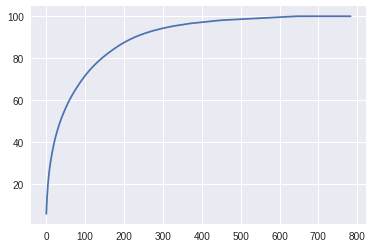

In [12]:
plt.plot(variance)

Looking at the data, we see not much steepness after value 75 on the x-axis, thus I will go with 75 components, to fit and transform the data 

In [13]:
pca = PCA(n_components=200)

In [14]:
df_pca = pca.fit_transform(df_std)

Transform the data depending on the principle components that were obtained from above step. <br>
This is very very easy, all the part of : **covariance matrix, eigen vector calculation, eigen value calculation, choosing the top 5 ones, is done by the above line**

The above line will transform the data according to the new principle components, but we really want to see how it has done it, don't we??

Below I have used a interactive plotting library 'plotly', the code is literally copy pasted from one of the kaggler's code and is very simple to comprehend.

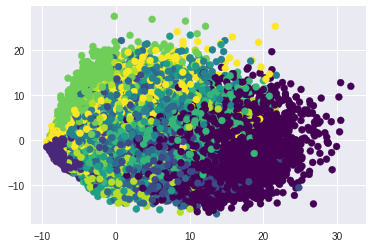

In [15]:
plt.scatter(data=df_pca, x = df_pca[:,0],y = df_pca[:,1], c=label, cmap='viridis')

Let's try to see the same scatter plot in 3D

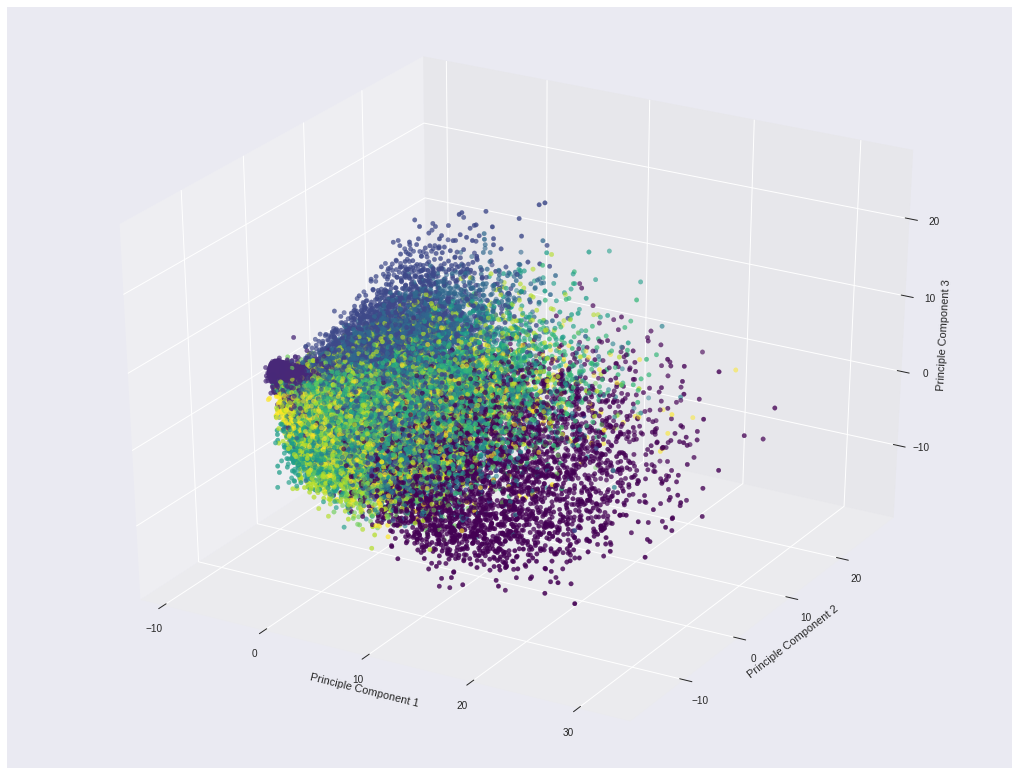

In [34]:
fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')
ax.set_zlabel('Principle Component 3')
ax.scatter(df_pca[:,0], df_pca[:,1], df_pca[:,2], c=label, cmap='viridis')
plt.show()

Though there is some fair bit of separation between that we can observe by looking at the colors, it is still not that evident. <br>
At this point it may feel that, all the damn efforts have gone down the drain, but we actually learned a fair lot of things here. <br>

In the next post, I will use t-SNE to plot the same figure and we will see how it helps us visualize what we tried to do above in a superb way!

# Bonus (Beware => Math Inside)

## Unboxing the black box called PCA

We are not done yet, we do need to learn the math behind the scenes.

We just now used a bunch of text book techniques, which will help us reduce the dimensions; but I really want to understand what I did, read on if you are on the same page. I will guide you step by step on what this black-box is doing internally.

### Standardizing

Though standardizing in this example won't do us any favour, check the pixel values below, they are anyways binary but I will keep the steps same so as to not confuse you.

In [35]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_std = StandardScaler().fit_transform(df)

### Covariance matrix 
Why is the covariance of a matrix important?
 
Suppose we have a 2D plot, we saw how variance helps us find the spread of data. <br>
But, let's say our spread of data is diagonal and not paraller to any of the 2D axis? <br>
In this case, covariance of (x,y) explains the diagonal spread, like the regression line for ex. <br>

Hence, we first find the covariance matrix and then go about finding the eigen values which will give the max spread i.e. spread; hence we can also infer that,  <br>
sum(eigen values) = sum(covariances of all dimensions)

Thus, if we find the covariance matrix, the diagonal elements are variances and off diagonal are covariances, and hence its symmetrix. Let's see an example below:

$$ \sum = [\sigma(x,x) \space \sigma(x,y) $$
$$  \space\space\space\space\space\space\space\space\space\space\space   \sigma(y,x) \space \sigma(y,y)] $$

With the above lines we can infer that, a 2D data is explained by its 2*2 covariance matrix, and its mean. 
Simillarly for a nD data, we will require n*n cov matrix.

#### Reference
http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/

$${CoVariance Matrix} = {1/n-1}*{\sum_{i=1}^n (X_i - \mu_x)^T(X_i - \mu_x)}$$

In [23]:
mean_vector = np.mean(df_std, axis=0)
cov_matrix = (df_std - mean_vector).T.dot((df_std - mean_vector)) / (df_std.shape[0]-1)

Another way to get the covariance matrix without much of the above noise is using the numpy way. <br>
**np.cov(df_std.T)**

Both the above methods, show the same results, however, its just the verbosity of the code, makes things understand better

### Eigen Decomposition

** Why is the eigen decomposition so needed and how do eigen values and eigen vectors help us here anyway?? **
From the above steps, we have the covariance matrix that gives the variance of the data and also the relation between the other features. If we are somehow able to represent the spread(variance) in terms of a vector, we will be able to find the scalar value with which it gets transformed and also the direction, which is our main goal, it would be very helpful in knowing which vectors i.e. dimensions help us explain the max spread in the data. Hence, we will be able to reduce the data to only include those dimensions/vectors that give the max spread.

Now, it can be proved that, if a matrix is diagonal, i.e. the covariances are 0, then the sum(variance) = sum(eigen values), but if the  matrix is not diagonal, then we can say that, the eigen values represent the variance of the along the direction of eigen vectors and variance components of the cov matrix explain the, spread of the data across axes.

So, now, on performing the eigen decomposition on the above matrix, we get the eigen values as well as the eigen vectors (principle components) using some numpy functions, calculating of eigen vectors and values manually isn't required as we have a library to support this <br>
**eig_vals, eig_vecs = np.linalg.eig(CoVariance_matrix)**

In [24]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print "<<==Eigen Values==>>\n{}".format(eig_vals)
print "----------------------------------------------------------------------------------------------- \n"
print "<<==Eigen Vectors==>>\n{}".format(eig_vecs)

<<==Eigen Values==>>
[  4.06964787e+01   2.91114657e+01   2.67833371e+01   2.08147194e+01
   1.81000206e+01   1.57876737e+01   1.38244007e+01   1.25432643e+01
   1.10638975e+01   1.00889267e+01   9.63617203e+00   8.65579470e+00
   8.04120472e+00   7.88086691e+00   7.43637560e+00   7.16743699e+00
   6.73538375e+00   6.61651973e+00   6.42354578e+00   6.26826675e+00
   5.93960379e+00   5.74928832e+00   5.48826880e+00   5.32649477e+00
   5.15217038e+00   4.94730998e+00   4.88853571e+00   4.70777145e+00
   4.46528559e+00   4.36351702e+00   4.32543150e+00   4.22712324e+00
   4.08726514e+00   4.06176768e+00   3.99903435e+00   3.86804997e+00
   3.81925839e+00   3.71256507e+00   3.57437538e+00   3.45887625e+00
   3.41436841e+00   3.36945857e+00   3.25693182e+00   3.24008824e+00
   3.18312949e+00   3.16286640e+00   3.14244041e+00   3.09287815e+00
   3.06368054e+00   3.02342271e+00   2.96849737e+00   2.91830693e+00
   2.84948896e+00   2.82806029e+00   2.79589667e+00   2.76696531e+00
   2.68974637

### Picking the principle components
Now, we sort the eigen vectors in the descending order of eigen values (eig_vals above), which way we get the top principle components.

We can add the eig_vals and eig_vecs in a dictionary, then do a python sort method, which will sort it in descending order like below: <br>

**eigen_val_vec_pair.sort(lambda x: x[0], reverse=True)**

In [25]:
# create pairs of the eigen values and eigen vectors so that they can be descendingly sorted w.r.t magnitude 
#of eigen values
eigen_val_vec_pair = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# sort them in descending order of eigen values
eigen_val_vec_pair.sort(key=lambda x: x[0], reverse=True)

# check if sorted correctly
print "++++++++++++++++++++++++++++++++++++Top 10 eigen values++++++++++++++++++++++++++++++++++++"
print [eigen_val_vec_pair[i][0] for i in range(1,10)]

++++++++++++++++++++++++++++++++++++Top 10 eigen values++++++++++++++++++++++++++++++++++++
[29.111465657226773, 26.783337098645184, 20.814719425177525, 18.100020588385302, 15.787673733771211, 13.82440067523534, 12.543264267317475, 11.063897454529718, 10.088926663741347]


### Explained variance for picking how many components we want to choose

We still have not decided on the number of components that are required, depending on the variance.
The explained variance (nothing but a percentage measure of variance) helps us decide the total percent of variance covered by each of the principle component by checking the eigen values.

In [26]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
variance_ = np.cumsum(var_exp)

### How many principle components should we have/take from the above dict?
For, this, we plot a CDF that will show us a curve and we can make a point where there is not much rise/fall in the graph, and we can choose that as the number of principle components, recheck the similar plot we drew above. 

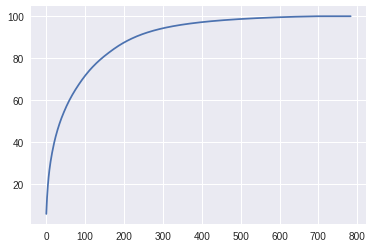

In [27]:
plt.plot(variance_)

Now, to explain this programatically, what we do is, take the dimension till which 85% of the variance is covered. Now, you may ask why 85?? That is not a golden standard, but it's actually the percentage of marks I wanted to get since 6th Grade in School and finally got it at 10th Grade when it mattered the most.
You may want to take 60%, if that's what you scored :P

So, 85% is just a good measure of variance here because, I can see by looking at the values that, there is not much significant gain that I get by including the other 5 or 10 or 15%, which means, if you look at the plot above, the exponentian curve is getting converted into a quadratic curve with less information gain. Hence, fixated at 85%

In [28]:
sum = 0
for k,v in enumerate(var_exp):
    sum += v
    if sum >= 85:
        print k
        break

179


In [29]:
sum = 0
for k,v in enumerate(var_exp):
    sum += v
    if sum >= 90:
        print k
        break

228


As you can see above, for just 5% gain in the variance I have increased the dimensions from ~180 to ~230, which means 50 DIMENSIONS. So, I let go of 90% and stick to 85%.

You may want to experiment with the data a lot and get to a close to appropriatae value

### Transformation in another space/dimension

I consider this part the most important. The reason is, unless you can project the eigen vectors with the standardized matrix on a particular visible dimension (1,2,3D) the point of above explanation is useless.

Make sure to see each of the below step and re-read if unclear. I can't emphasize enough; this is the most important of all the parts. 

In [37]:
df_std.shape

(42000, 784)

In [42]:
eigen_val_vec_pair[1][1].shape

(784,)

In [59]:
eigen_array = np.zeros((180,784))

In [60]:
eigen_array.shape

(180, 784)

In [61]:
for i in range(180):
    eigen_array[i] = eigen_val_vec_pair[i][1]

In [63]:
df_std.shape

(42000, 784)

In [65]:
eigen_array.T.shape

(784, 180)

In [67]:
W = df_std.dot(eigen_array.T)

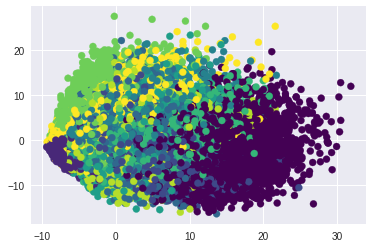

In [71]:
plt.scatter(W[:,0], W[:,1], c=label, cmap='viridis')
plt.show()

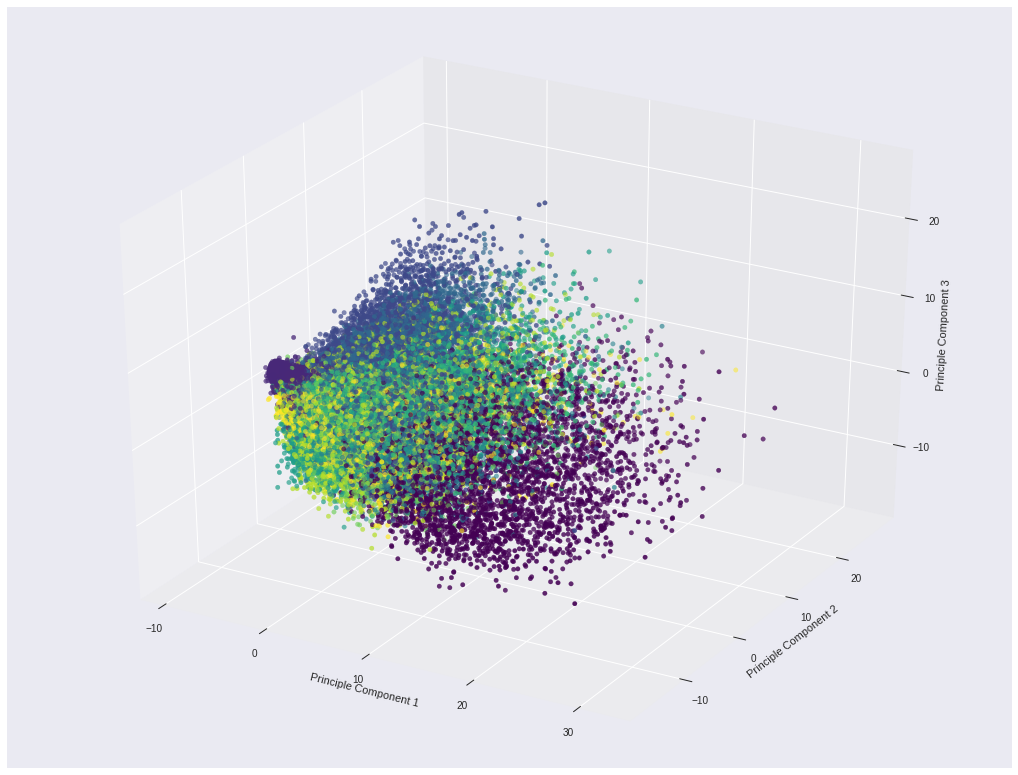

In [68]:
fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')
ax.set_zlabel('Principle Component 3')
ax.scatter(W[:,0], W[:,1], W[:,2], c=label, cmap='viridis')
plt.show()

And with that, we are done with Math part. If it was too heavy, make sure to get the Linear Algebra basics sorted out. This is one of the simplest concepts in Machine Learning with actually very less math behind it.

So, I recommend going through Khan Academy's Linear Algebra course, at least the vectors and eigen vectors part. You can reserve matrices for later if you know the basic properties of matrices.

For, comprehensive stude, you may want to check Gilbert Strang's videos which will get you from Zero to Hero.

# References
PCA  <br>
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html <br>
https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/ <br>

Data warehousing and DBMS <br>
https://code.facebook.com/posts/229861827208629/scaling-the-facebook-data-warehouse-to-300-pb/ <br>
http://highscalability.com/blog/2013/4/15/scaling-pinterest-from-0-to-10s-of-billions-of-page-views-a.html <br>
https://medium.com/@Pinterest_Engineering/sharding-pinterest-how-we-scaled-our-mysql-fleet-3f341e96ca6f <br>

Digital Marketing terms <br>
http://www.business2community.com/digital-marketing/20-must-know-digital-marketing-definitions-0797241#lva7eV0FqIrBA2a9.97 <br>

# Note

The tracking data is certainly very huge in terms of data points but the features/dimensions may not be too many, and may not require reduction using PCA. However, I being from a **digital marketing background** wanted to explain the concepts with what best I can do and also keep the users engaged. :) <br>

### PS:
I will also make sure to add some custom images so that the sections are more crisp and clear. 

Thanks for reading. :)